In [ ]:
!pip install -U transformers

## 사람 얼굴 사진을 바탕으로 나이 예측하는 모델
Model page: https://huggingface.co/dima806/fairface_age_image_detection


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="dima806/fairface_age_image_detection", device=0)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [ ]:
# 적당한 사진을 업로드 합니다.

pipe("/content/test.png")

[{'label': '30-39', 'score': 0.42381325364112854},
 {'label': '40-49', 'score': 0.3881435990333557},
 {'label': '20-29', 'score': 0.06966222077608109},
 {'label': '50-59', 'score': 0.06861912459135056},
 {'label': '60-69', 'score': 0.014231393113732338}]

## Facebook에서 만든 bert 후속 모델
Model page: https://huggingface.co/FacebookAI/roberta-large

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="FacebookAI/roberta-large", device=0)

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
pipe("I <mask> this interesting movie")

[{'score': 0.2601053714752197,
  'token': 3996,
  'token_str': ' watched',
  'sequence': 'I watched this interesting movie'},
 {'score': 0.1330379843711853,
  'token': 303,
  'token_str': ' found',
  'sequence': 'I found this interesting movie'},
 {'score': 0.1115596815943718,
  'token': 794,
  'token_str': ' saw',
  'sequence': 'I saw this interesting movie'},
 {'score': 0.10072465986013412,
  'token': 3776,
  'token_str': ' enjoyed',
  'sequence': 'I enjoyed this interesting movie'},
 {'score': 0.08575402200222015,
  'token': 6640,
  'token_str': ' liked',
  'sequence': 'I liked this interesting movie'}]

# 언어 모델이 텍스트를 이해하는 방법, 임베딩
Model page: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [ ]:
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

sentences = [
    "That is a happy person",
    "That is a happy dog",
    "That is a very happy person",
    "Today is a sunny day"
]
embeddings = model.encode(sentences)

similarities = model.similarity(embeddings, embeddings)
print(similarities.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

torch.Size([4, 4])


In [ ]:
similarities

tensor([[1.0000, 0.6946, 0.9429, 0.2569],
        [0.6946, 1.0000, 0.6211, 0.2491],
        [0.9429, 0.6211, 1.0000, 0.2106],
        [0.2569, 0.2491, 0.2106, 1.0000]])

In [ ]:
embeddings

array([[-0.03387689,  0.09194157,  0.04870133, ..., -0.01439257,
        -0.02754978,  0.0447583 ],
       [ 0.00504995,  0.06316976,  0.01415726, ...,  0.04035439,
         0.07584123,  0.09087346],
       [-0.00248319,  0.09151711,  0.04838626, ..., -0.02641123,
        -0.07529833,  0.0280321 ],
       [-0.01629126,  0.10406607,  0.09740782, ...,  0.00676724,
        -0.0878846 ,  0.03404385]], dtype=float32)

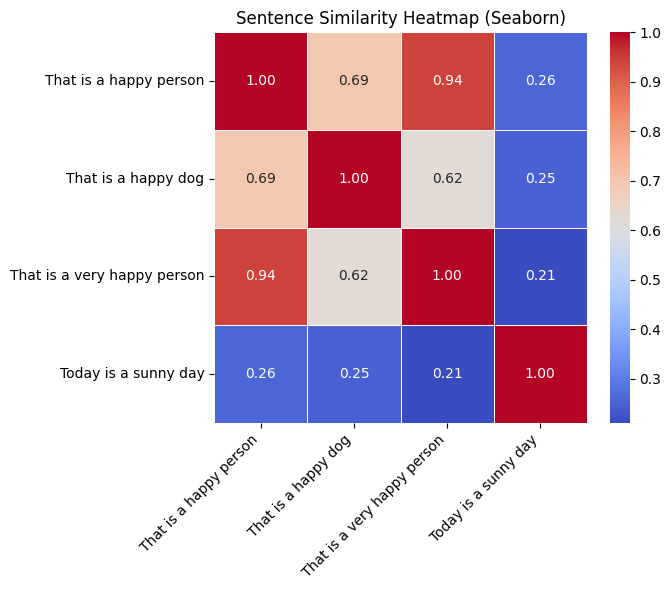

In [ ]:
plt.figure(figsize=(7, 6))

sns.heatmap(
    similarities,
    annot=True,            # 셀 안에 숫자 표시
    fmt=".2f",             # 소수점 2자리
    cmap="coolwarm",       # Blue → Red
    linewidths=.5,         # 셀 경계선
    cbar=True,             # 색상바 출력
    xticklabels=sentences, # x축에 문장
    yticklabels=sentences  # y축에 문장
)

plt.title("Sentence Similarity Heatmap (Seaborn)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
